In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
df = pd.read_csv('transport_data_cleaned_bunte.csv')

In [3]:
df['qsi kg/s'] = df['qsi g/s/m']/1000
df['Wi_star'] = (1.65*9.81*df['qsi kg/s'])/((df['Fi']*100)*((9.81*df['h']*df['S'])**0.5)**3)

In [4]:
x1 = np.arange(0.7, 2.01, 0.01)
y1 = 0.0008*x1**7.5
x2 = np.arange(1.99, 4, 0.01)
y2 = 14*(1-(1.11/x2**0.8))**4.5

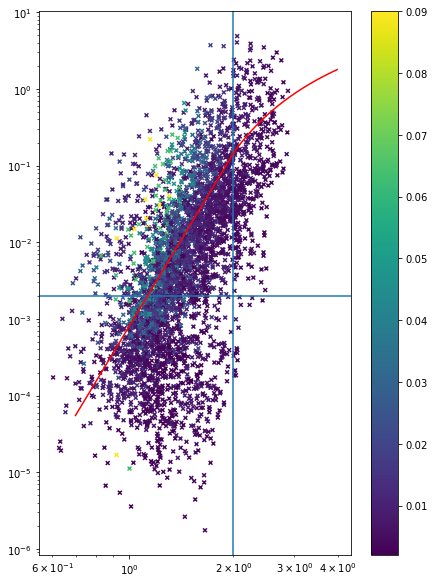

In [5]:
fig, ax = plt.subplots(figsize=(7,10))
pts = ax.scatter(df['gs_ratio'], df['Wi_star'], c=df['D'], marker='x', s=15)
ax.axvline(2)
ax.axhline(0.002)
ax.plot(x1, y1, c='r')
ax.plot(x2, y2, c='r')
ax.set_xscale('log')
ax.set_yscale('log')
cbar = fig.colorbar(pts)
plt.show()

In [6]:
df2 = pd.read_csv('transport_data_cleaned_cut_bunte.csv')
df2['qsi kg/s'] = df2['qsi g/s/m']/1000
df2['Wi_star'] = (1.65*9.81*df2['qsi kg/s'])/((df2['Fi']*100)*((9.81*df2['h']*df2['S'])**0.5)**3)

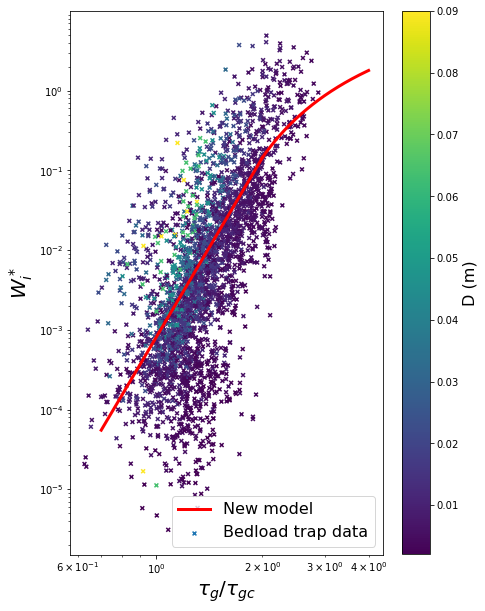

In [7]:
fig, ax = plt.subplots(figsize=(7,10))
pts = ax.scatter(df2['gs_ratio'], df2['Wi_star'], c=df2['D'], marker='x', s=15, label="Bedload trap data")
#ax.axvline(2)
ax.plot(x1, y1, c='r', linewidth=3, label='New model')
ax.plot(x2, y2, c='r', linewidth=3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\tau_g/\tau_{gc}$', fontsize=20)
ax.set_ylabel(r'$W_i^*$', fontsize=20)
cbar = fig.colorbar(pts).set_label('D (m)', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
#plt.savefig('Gilbert_model.png', dpi=150)
plt.show()

Random sample residuals

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df3 = df[df['gs_ratio']>0.7]

In [10]:
train, test = train_test_split(df3, test_size = 0.1)

In [12]:
test['pred'] = 0
for i in test.index:
    if test.loc[i, 'gs_ratio'] < 2:
        test.loc[i, 'pred'] = 0.0008*test.loc[i, 'gs_ratio']**7.5
    elif test.loc[i, 'gs_ratio'] >= 2:
        test.loc[i, 'pred'] = 14*(1-(1.11/test.loc[i, 'gs_ratio']**0.8))**4.5

/home/jordan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
test['residuals'] = test['pred'] / test['Wi_star']

/home/jordan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


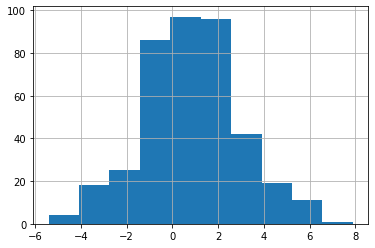

In [14]:
np.log(test['residuals']).hist()

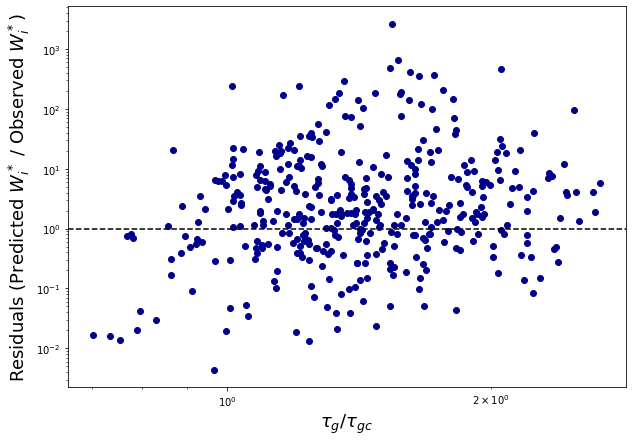

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
pts = ax.scatter(test['gs_ratio'], test['residuals'], c='darkblue')
ax.axhline(1, c='k', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\tau_g/\tau_{gc}$', fontsize=18)
ax.set_ylabel(r'Residuals (Predicted $W_i^*$ / Observed $W_i^*$)', fontsize=18)
#cbar = fig.colorbar(pts).set_label('D (m)', fontsize=16)
#plt.legend(loc='lower right', fontsize=16)
#plt.savefig('residuals_400pts.png', dpi=150)
plt.show()